<a href="https://colab.research.google.com/github/Nelli25/Final_Task/blob/main/Case_Molodkina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
!pip install --upgrade matplotlib > None # need refresh enviroment after installation

In [169]:
!pip install basemap > None

In [170]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
from mpl_toolkits.basemap import Basemap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

# Data intro

Этот набор данных содержит показания мультисенсорной матрицы оксидов металлов, коммерческих датчиков температуры и влажности, а также наземные измерения содержания загрязняющих веществ: CO, C6H6, NOx и NO2.

In [171]:
!pwd

/content


In [172]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/AirQuality.csv', sep=';', decimal=',')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [173]:
data.tail(116)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN,NaN
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,NaN,NaN
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Очистка данных**

In [174]:
# Удалим ненужные колонки
data = data.drop(['Date','Time','Unnamed: 15','Unnamed: 16'], axis = 1)

# Удалим нулевые значения в конце
data = data.dropna()
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


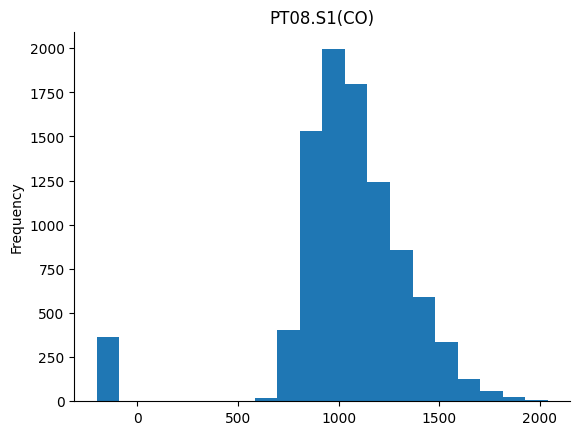

In [175]:
# @title PT08.S1(CO)

from matplotlib import pyplot as plt
data['PT08.S1(CO)'].plot(kind='hist', bins=20, title='PT08.S1(CO)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [176]:
# удаляем пропущенные и нулевые значения
import numpy as np
data = data.replace(-200,np.nan)
data.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

<Axes: >

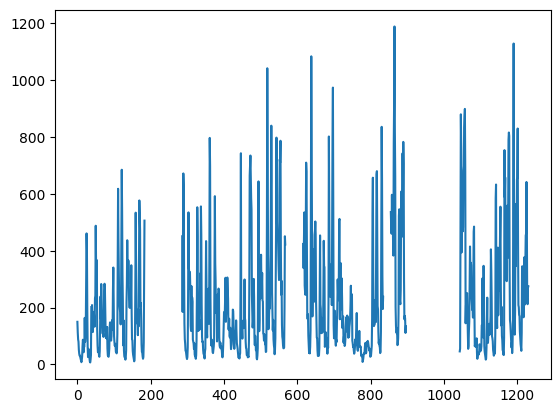

In [177]:
# Этот показатель показывает неправильные значения
data['NMHC(GT)'].plot()

<Axes: >

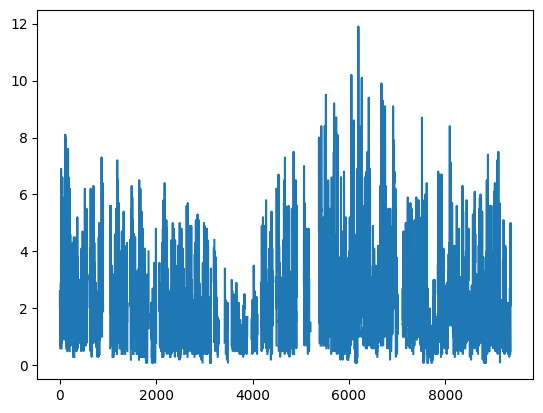

In [178]:
data['CO(GT)'].plot()

# **Корреляционная матрица**

Из корреляционной матрицы мы можем видеть корреляцию между 4 из 5 датчиков оксида металла, подтверждающую перекрестную чувствительность этой матрицы датчиков. Эти 4 датчика являются надежными индикаторами газов, связанных с качеством воздуха, и, похоже, на них не влияют температура и влажность.

Из-за разреженности точек данных NMHC(GT) он не показывает существенной корреляции с используемыми датчиками.

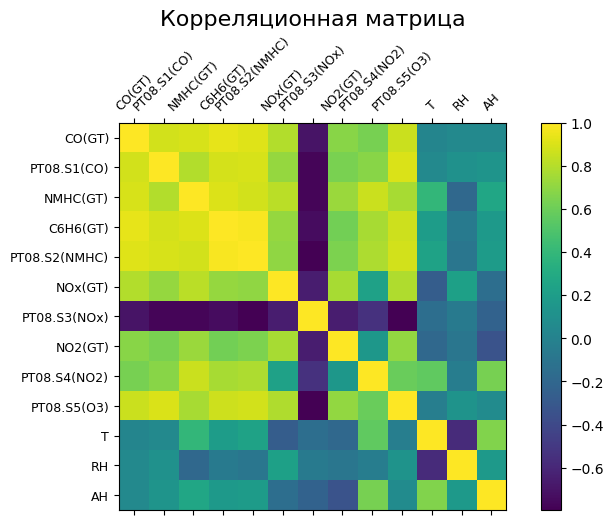

In [179]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(9, 5))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Корреляционная матрица', fontsize=16);

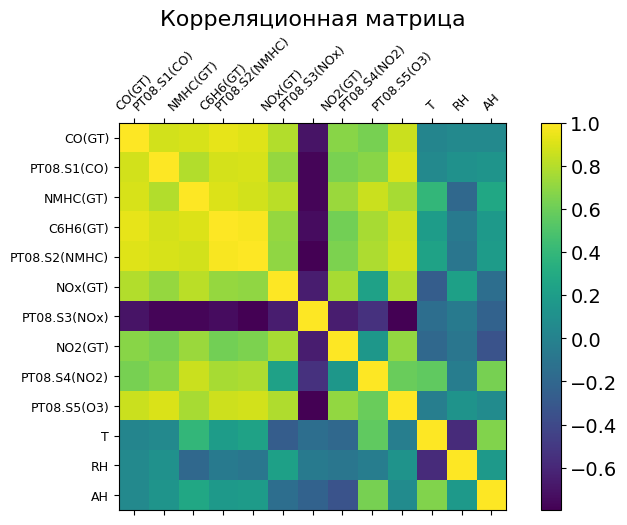

In [180]:
# Удалим показатели NMHC(GT) из наших данных
f = plt.figure(figsize=(9, 5))
plt.matshow(data[data['NMHC(GT)']!=275].corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=9, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Корреляционная матрица', fontsize=16);

In [181]:
data = data.drop('NMHC(GT)', axis=1)
data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Удалим столбец с датами

# Тип данных

In [182]:
data.shape

(9357, 12)

In [183]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [184]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

In [185]:
data.isna().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

## Numerical columns

In [186]:
num_cols = data.select_dtypes(exclude='object')
num_cols.shape

(9357, 12)

In [187]:
num_cols.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## Categorical columns

In [188]:
cat_cols = data.select_dtypes(include='object')
cat_cols.head()

""
0
1
2
3
4


In [189]:
cat_cols.shape

(9357, 0)

### Try label encoding

## Scatterplots with targets

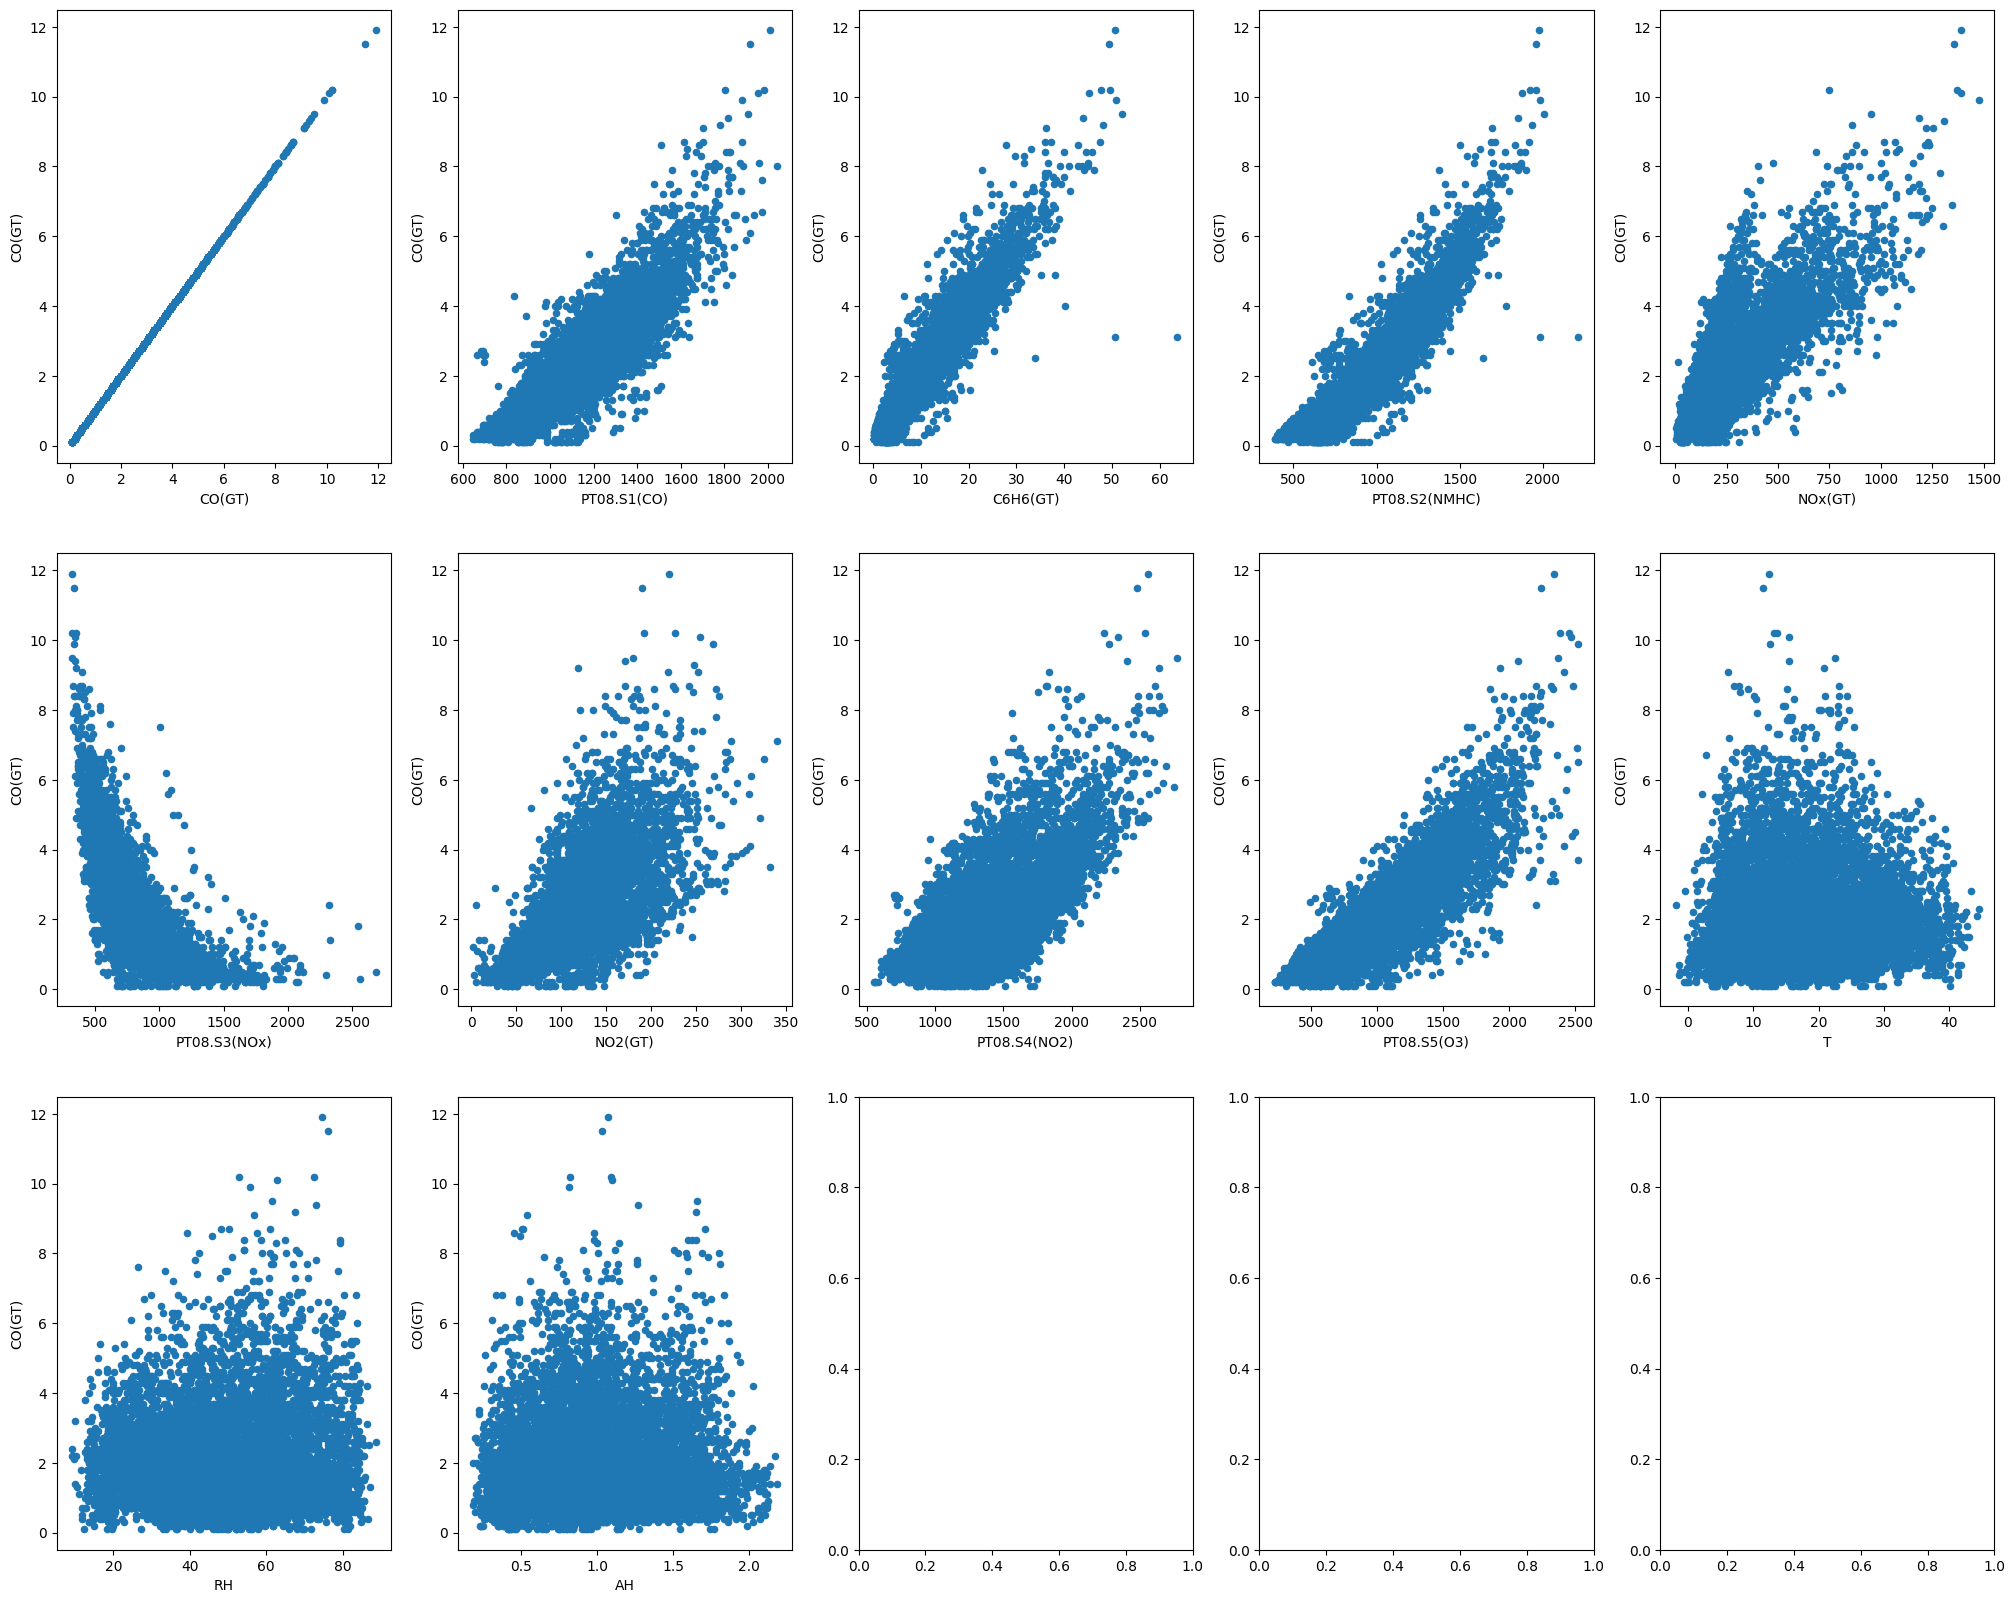

In [190]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "CO(GT)", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

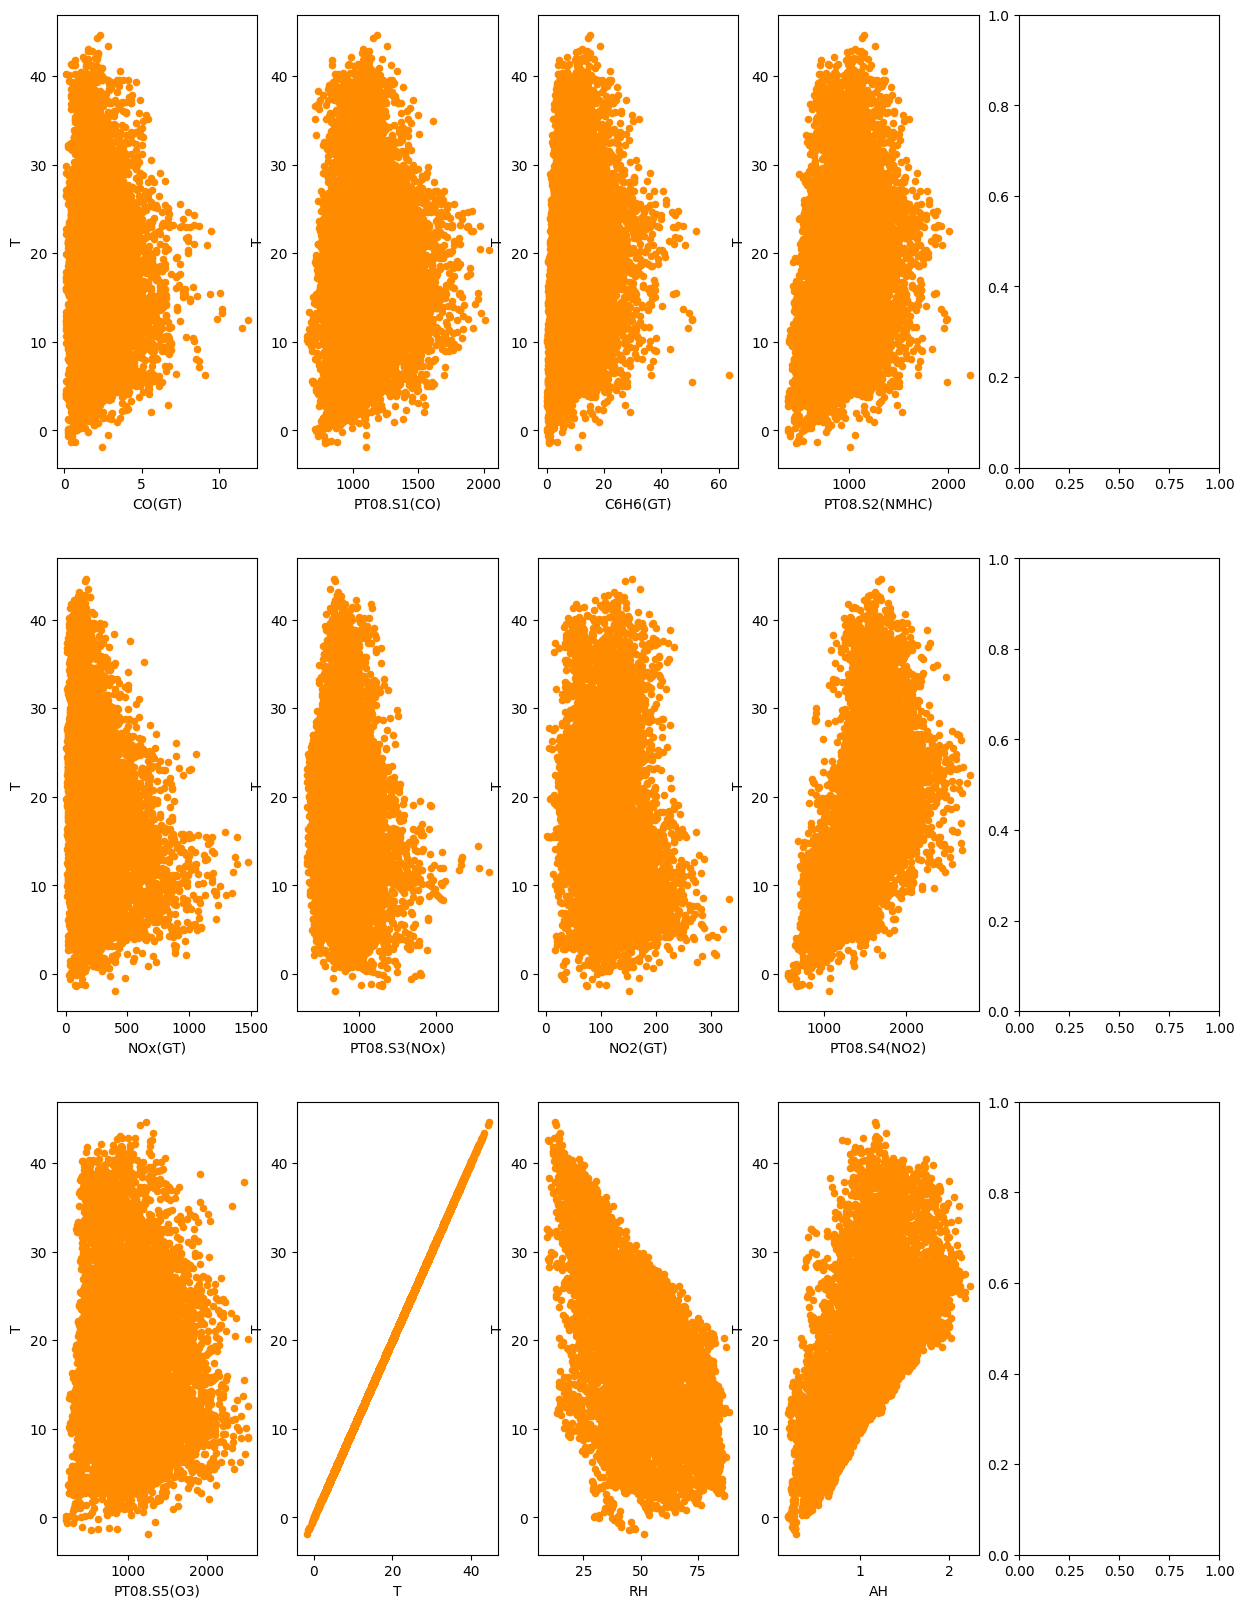

In [191]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 20))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "T", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], color='darkorange')

## Outliers

In [192]:
num_cols = data.select_dtypes(exclude='object')
num_cols.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

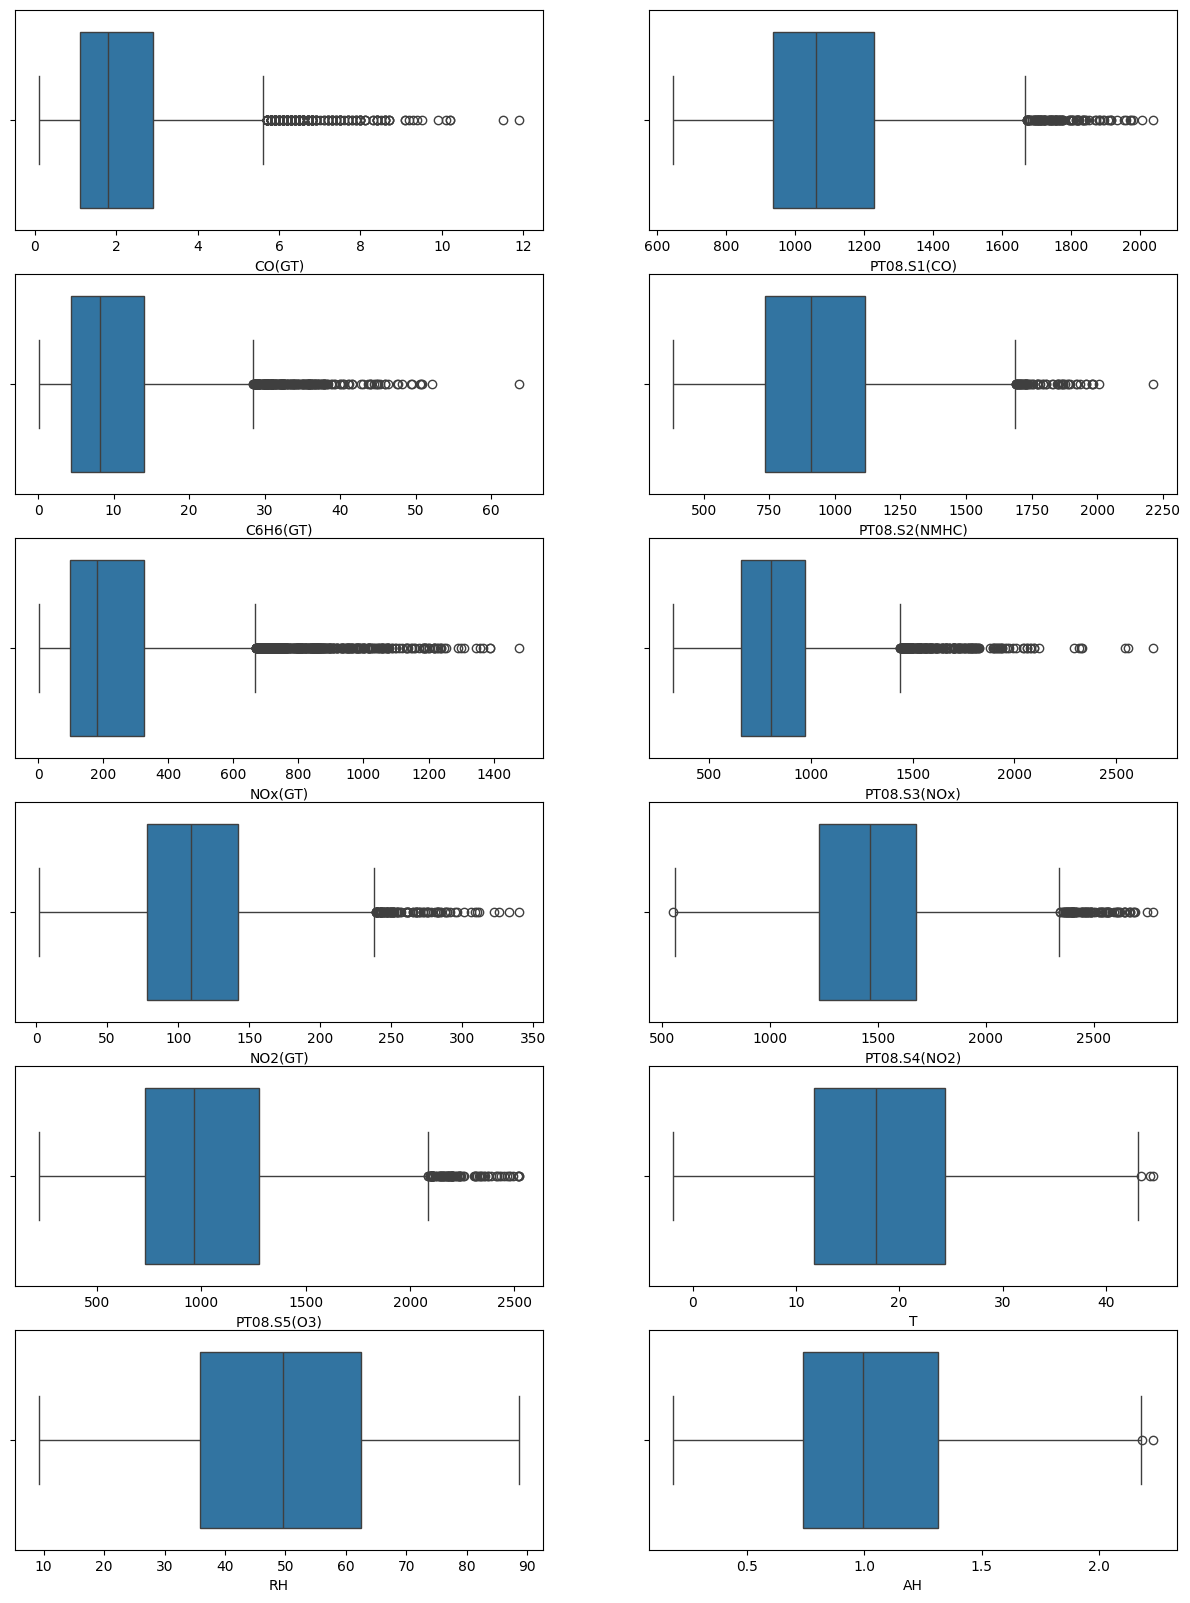

In [193]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
count = 0
for idx, feature in enumerate(num_cols.columns):
    sns.boxplot(x=data[feature], ax=axes[idx // 2, idx % 2])


In [194]:
for col in num_cols.columns:
    print(f'Outliers for {col} column: {boxplot_stats(data[col]).pop(0)["fliers"]}\n')

Outliers for CO(GT) column: []

Outliers for PT08.S1(CO) column: []

Outliers for C6H6(GT) column: []

Outliers for PT08.S2(NMHC) column: []

Outliers for NOx(GT) column: []

Outliers for PT08.S3(NOx) column: []

Outliers for NO2(GT) column: []

Outliers for PT08.S4(NO2) column: []

Outliers for PT08.S5(O3) column: []

Outliers for T column: []

Outliers for RH column: []

Outliers for AH column: []



## Distibutions of num features

In [195]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')

## Correlation matrix

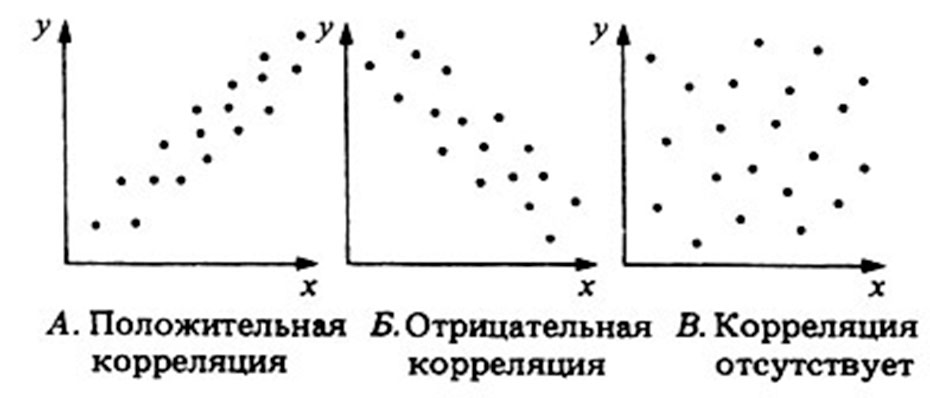

## PCA(n_components=3)

In [196]:
num_cols.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [197]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(num_cols)
data_scaled[:5]

array([[ 3.07778409e-01,  1.19855011e+00,  2.43897946e-01,
         4.00449705e-01, -3.79858636e-01,  8.58659606e-01,
        -1.88663472e-03,  6.80947102e-01,  6.15099542e-01,
        -5.34197181e-01, -1.93001981e-02, -6.63043106e-01],
       [-1.05115626e-01,  8.85284172e-01, -9.16993091e-02,
         5.93914510e-02, -6.75681379e-01,  1.31815573e+00,
        -4.36067208e-01,  2.96762275e-01, -1.27756504e-01,
        -5.68166016e-01, -8.86005498e-02, -7.43035152e-01],
       [ 3.25157191e-02,  1.39203790e+00, -1.45394870e-01,
        -5.74835314e-04, -5.44204604e-01,  1.18575854e+00,
         1.87886307e-02,  2.85207844e-01,  1.28227674e-01,
        -7.26687248e-01,  2.75226297e-01, -6.81864764e-01],
       [ 3.25157191e-02,  1.27225974e+00, -1.18547089e-01,
         3.31562008e-02, -3.51685041e-01,  9.98844864e-01,
         1.84190754e-01,  3.68977468e-01,  4.51972369e-01,
        -8.28593754e-01,  6.21728056e-01, -5.91471276e-01],
       [-3.80378316e-01,  7.93147131e-01, -4.8099212

In [198]:
data_scaled.shape

(9357, 12)

There are some distant points

3D

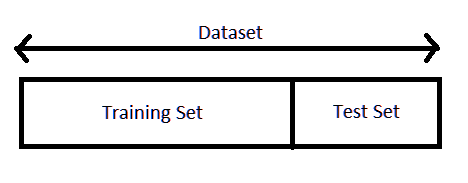

## Метрики задачи классификации

### Подготовка данных

In [200]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [211]:
data.dropna()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Разделение данных на обучающую и тестовую выборки


In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Признаки должны быть в столбцах, целевая переменная - в отдельном столбце

# Выделение признаков и целевой переменной
X = data.drop('CO(GT)', axis=1)  # Указываем axis=1, чтобы удалить столбец 'CO(GT)'
y = data['CO(GT)']  # Выбираем только столбец 'CO(GT)' как целевую переменную

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

# Выводим размеры полученных выборок
print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (7017, 11) (7017,)
Размер тестовой выборки: (2340, 11) (2340,)


DummyClassifier - baseline

In [235]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

Логистическая регрессия - более сложная модель

In [236]:
# Удаление строк с пропущенными значениями
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
# Удаление строк с пропущенными значениями
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

In [239]:
# Выравнивание данных по количеству образцов
X_train = X_train[:min(len(X_train), len(X_test))]
X_test = X_test[:min(len(X_train), len(X_test))]
y_train = y_train[:min(len(X_train), len(X_test))]
y_test = y_test[:min(len(X_train), len(X_test))]

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.2856805717694035


## Метрики задачи регрессии

### Подготовка данных

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7407,1469.0,24.0,1403.0,758.0,452.0,134.0,1780.0,1665.0,8.8,73.2,0.8298
1360,1043.0,12.5,1066.0,161.0,789.0,114.0,1692.0,1014.0,20.2,37.7,0.8833
9341,1100.0,5.1,769.0,170.0,722.0,128.0,1147.0,1049.0,14.3,52.5,0.8497
2888,1023.0,6.2,822.0,65.0,823.0,74.0,1585.0,1050.0,27.9,41.6,1.5425
1804,858.0,4.8,756.0,65.0,1159.0,73.0,1209.0,564.0,17.3,25.6,0.5032


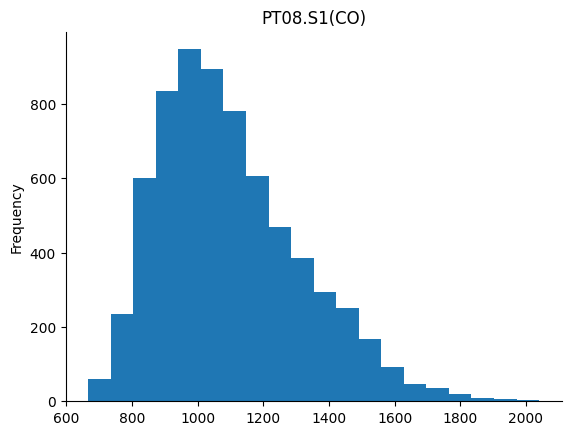

In [256]:
# @title PT08.S1(CO)

from matplotlib import pyplot as plt
X_train['PT08.S1(CO)'].plot(kind='hist', bins=20, title='PT08.S1(CO)')
plt.gca().spines[['top', 'right',]].set_visible(False)

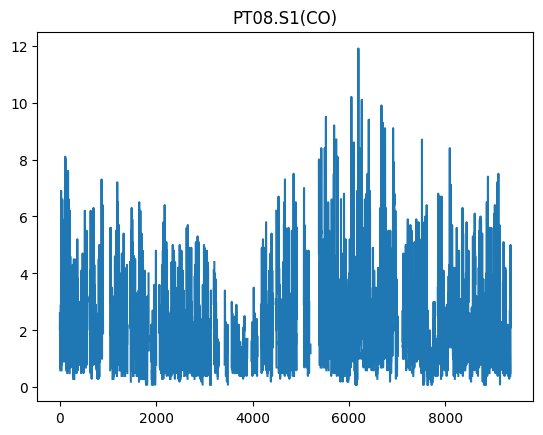

In [260]:
y.plot(kind='line', title='PT08.S1(CO)');

In [272]:
# Удаление строк с пропущенными значениями
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
# Удаление строк с пропущенными значениями
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

In [273]:
# Выравнивание данных по количеству образцов
X_train = X_train[:min(len(X_train), len(X_test))]
X_test = X_test[:min(len(X_train), len(X_test))]
y_train = y_train[:min(len(X_train), len(X_test))]
y_test = y_test[:min(len(X_train), len(X_test))]

In [274]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

In [275]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

### MSE & RMSE

MSE – одна из самых популярных метрик в задаче регрессии.

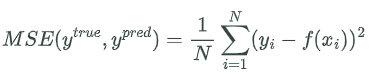

In [276]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd

In [277]:
print(f'MSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'MSE for Linear regression: {mean_squared_error(y_test, y_preds_lr)}')

MSE for Dummy Regressor: 2.413900862068966
MSE for Linear regression: 2.2856805717694035


In [278]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE for Dummy Regressor: 1.5536733447121265
RMSE for Linear regression: 1.5118467421565598


In [279]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

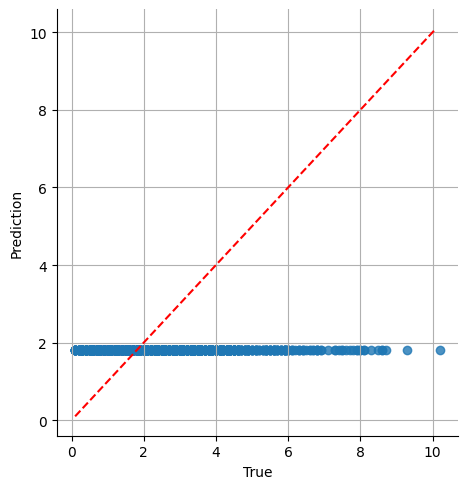

In [280]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

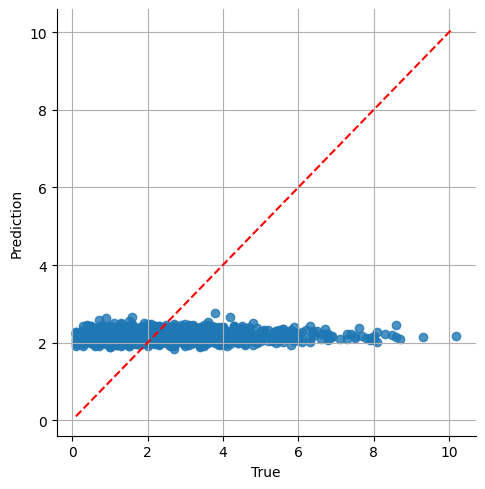

In [281]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

MSE квадратично штрафует за большие ошибки на объектах. Сильный штраф за ошибки - полезное свойство, но если тестовых данных присутствуют выбросы, то нам будет сложно объективно сравнить модели между собой: ошибки на выбросах будет маскировать различия в ошибках на основном множестве объектов.

Таким образом, если мы будем сравнивать две модели при помощи MSE, у нас будет выигрывать та модель, у которой меньше ошибка на объектах-выбросах

RMSE - квадратный корень из MSE. Рассчитывается в тех же единицах, что и целевая переменная

### MAE

Для уменьшения чувствительности к выбросам можно использовать MSE

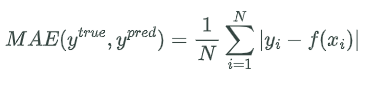

In [282]:
from sklearn.metrics import mean_absolute_error

In [283]:
print(f'MAE for Dummy Regressor: {mean_absolute_error(y_test, y_preds_dummy)}')
print(f'MAE for Linear regression: {mean_absolute_error(y_test, y_preds_lr)}')

MAE for Dummy Regressor: 1.1182112068965517
MAE for Linear regression: 1.1646528900661648


### MAPE

MSE и MAE считают абсолютную ошибку, однако бывает полезно посчитать относительную, например, в процентах

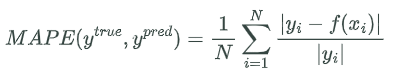

In [284]:
from sklearn.metrics import mean_absolute_percentage_error

In [285]:
print(f'MAPE for Dummy Regressor: {mean_absolute_percentage_error(y_test, y_preds_dummy)}')
print(f'MAPE for Linear regression: {mean_absolute_percentage_error(y_test, y_preds_lr)}')

MAPE for Dummy Regressor: 0.8447969397482203
MAPE for Linear regression: 1.04088821188733


### Коэффициент детерминации

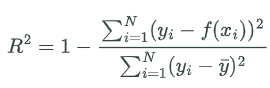

Коэффициент детерминации показывает, какая доля дисперсии таргетов (знаменатель) объяснена моделью. У идеальных предсказаний равен 1, у лучшего константного предсказания он равен  0 на обучающей выборке.

In [286]:
from sklearn.metrics import r2_score

In [287]:
print(f'R2 score for Dummy Regressor: {r2_score(y_test, y_preds_dummy)}')
print(f'R2 score for Linear regression: {r2_score(y_test, y_preds_lr)}')

R2 score for Dummy Regressor: -0.061596142665039766
R2 score for Linear regression: -0.00520684858411391


Основная проблема применения этой метрики заключается в том, что ее значение увеличивается (не уменьшается) от добавления в модель новых переменных, даже если эти переменные никакого отношения к объясняемой переменной не имеют. Поэтому сравнение моделей с разным количеством факторов с помощью коэффициента детерминации, вообще говоря, некорректно. Для этих целей можно использовать альтернативные показатели (adjusted R squared).

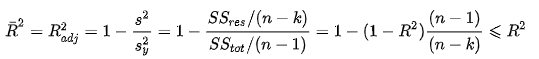

 n — количество наблюдений, k — количество параметров

In [289]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, rand_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


import matplotlib.pyplot as plt

## Кластеризация

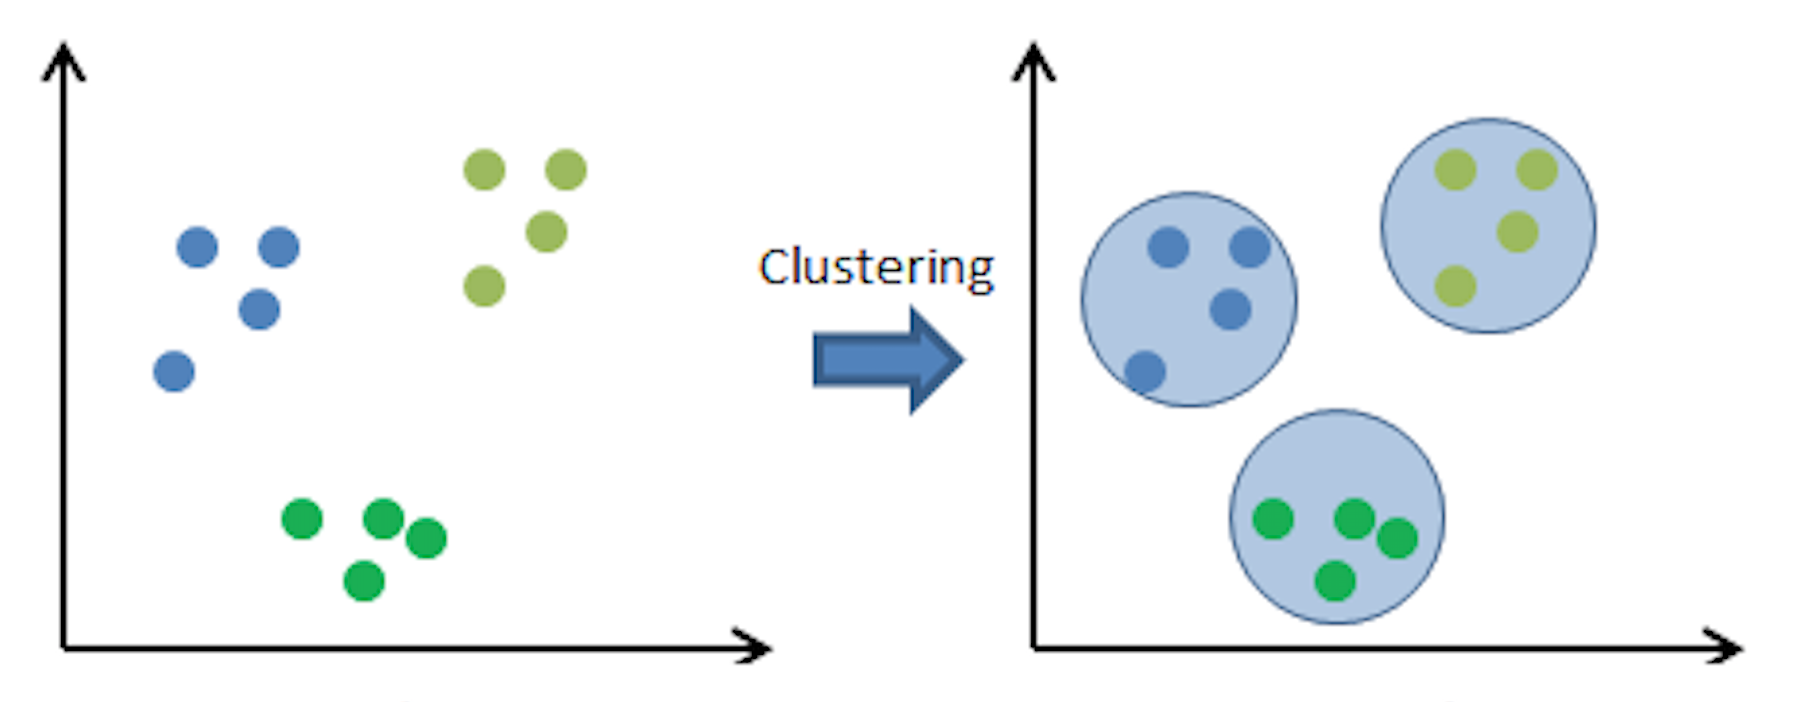

### Зачем?

- Классификация объектов. Попытка понять зависимости между объектами путем выявления их кластерной структуры.
- Сжатие данных. Можно сократить размер исходной выборки, взяв один или несколько наиболее типичных представителей каждого кластера.
- Выделение аномалий - объектов, которые не подходят по критериям ни в один кластер. Обнаруженные объекты в дальнейшем обрабатывают отдельно.

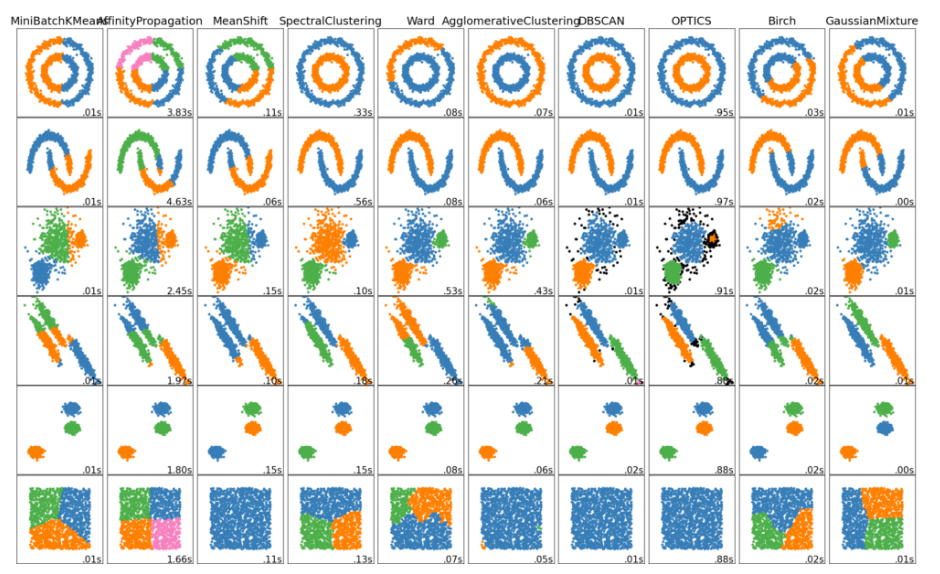

### K-means

#### Основная идея метода

Итеративное повторение двух шагов:

- Распределение объектов выборки по кластерам
- Пересчёт центров кластеров

Более подробно:

- Выбираются k центров будущих кластеров
- Каждый объект относят к одному из выбранных центров, ориентируясь на расстояние
- Центры кластеров пересчитываются как среднее арифметическое векторов вошедших в этот кластер объектов и обновляются
- Объекты относят к новым центрам кластеров
- ...

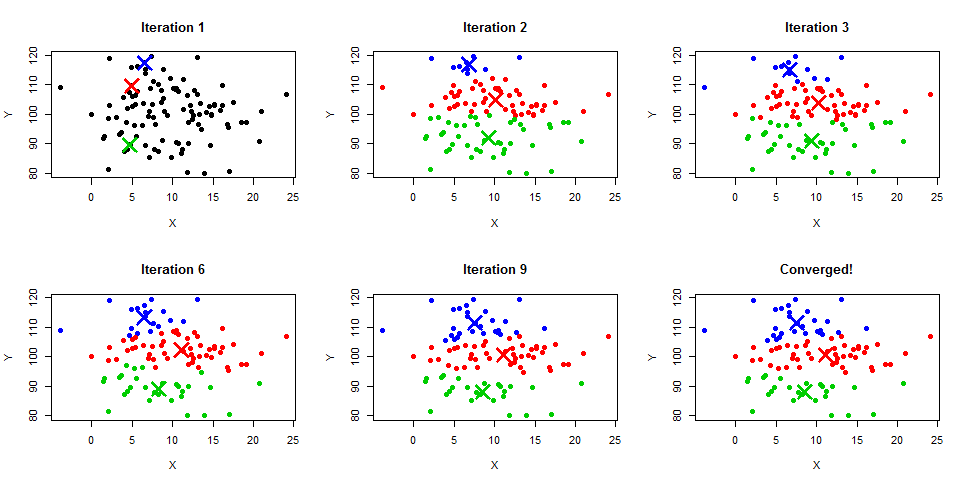

#### Проблемы

- Чувствительность к начальной инициализации
- Заранее необходимо знать k

#### Как подобрать количество кластеров?

Метод локтя

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)


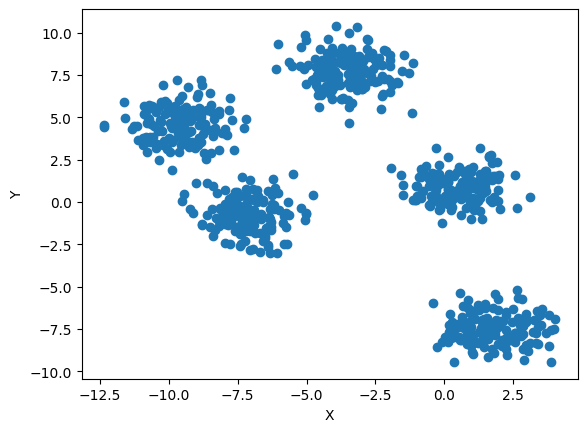

In [301]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

`inertia_` - сумма квадратов расстояний от объектов до ближайших центров кластеров

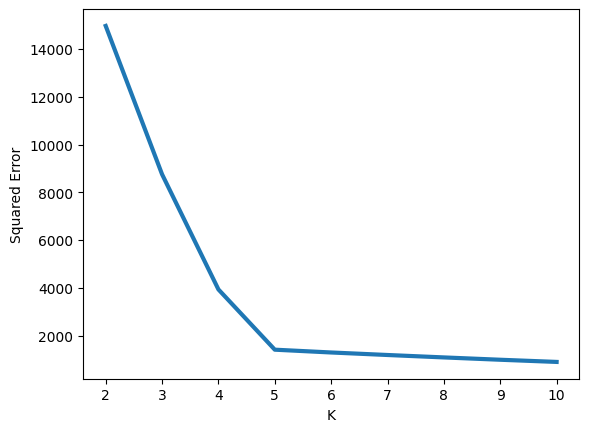

CPU times: user 603 ms, sys: 111 ms, total: 714 ms
Wall time: 418 ms


In [302]:
%%time

se = []

for k in range(2, 11):
    clustering = KMeans(n_clusters=k)
    clustering.fit(X_train)
    se.append(clustering.inertia_)

plt.plot(range(2, 11), se, linewidth='3')
plt.xlabel("K")
plt.ylabel("Squared Error")
plt.show()

Силуэт

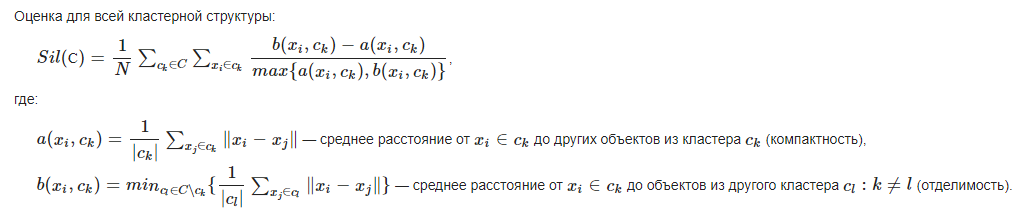

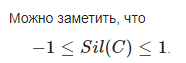

In [303]:
silhouette = []

for k in range(2, 11):
  clustering = KMeans(n_clusters=k).fit(X_train)
  labels = clustering.labels_
  silhouette.append(silhouette_score(X_train, labels, metric='euclidean'))

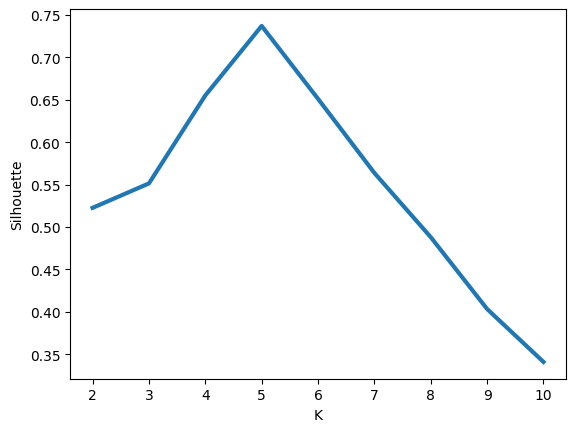

In [304]:
plt.plot(range(2, 11), silhouette, linewidth='3')
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()

### Метрики качества

#### Индекс Rand


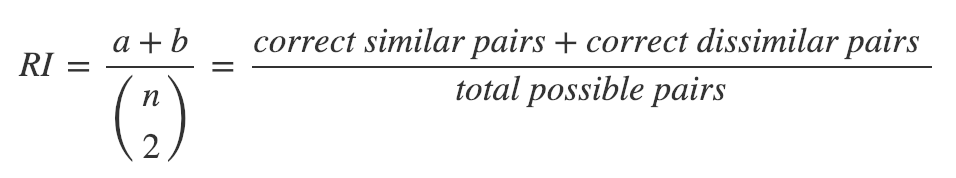

#### Индекс Дэвиcа-Боулдина

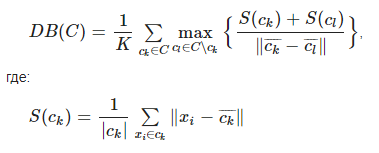

Метрика вычисляет компактность как расстояние от объектов кластера до их центроидов, а отделимость - как расстояние между центроидами.

### Иерархическая кластеризация

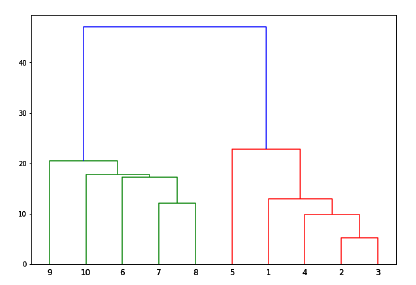

In [317]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Загрузка данных в DataFrame "data"
data = pd.read_csv('drive/MyDrive/Colab Notebooks/AirQuality.csv', sep=';', decimal=',')
# Удалим ненужные колонки
data = data.drop(['Date','Time','Unnamed: 15','Unnamed: 16'], axis=1)

# Удалим строки с пропущенными значениями
data = data.dropna()

# Преобразование данных в тип данных float
data = data.astype(float)

# Выполнение иерархической кластеризации
linked = linkage(data, 'single')

# Построение дендрограммы
plt.figure(figsize=(10, 7))
def recursive_function(depth):
    if depth > 1000:  # Устанавливаем предельную глубину рекурсии
        return
    # Ваш код для рекурсивной функции
    recursive_function(depth + 1)
dendrogram(linked, leaf_rotation=90, leaf_font_size=8)  # Исправлено здесь, добавлены параметры leaf_rotation и leaf_font_size

plt.show()

RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 1000x700 with 0 Axes>

In [306]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.data_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.data_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.data_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'data_'

### DBSCAN

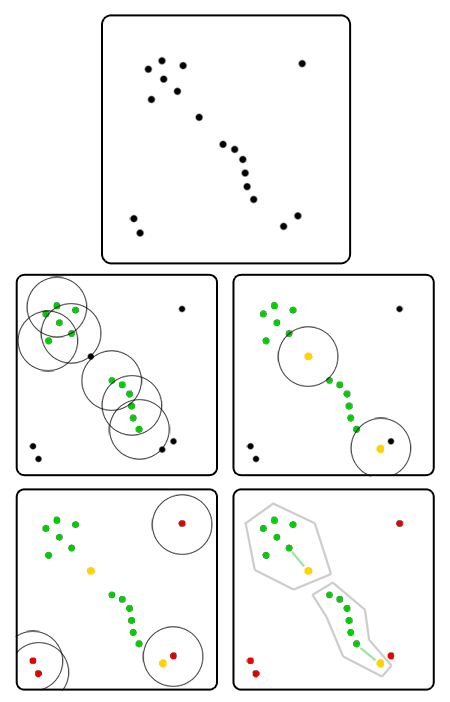

Алгоритм DBSCAN рассматривает кластеры, как участки высокой плотности, разделенные районами с низкой плотностью.

В алгоритме есть два параметра, `min_samples` и `eps`, которые формально определяют, что мы имеем в виду, когда говорим «плотный» . Высокие значения `min_samples` или низкие `eps` указывают на более высокую плотность, необходимую для формирования кластера.

Automatically created module for IPython interactive environment


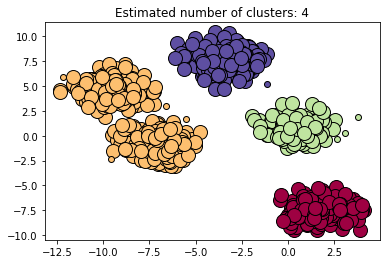

In [ ]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)


db = DBSCAN(eps=0.3, min_samples=10).fit(scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show();

## Снижение размерности - Метод главных компонент (PCA)

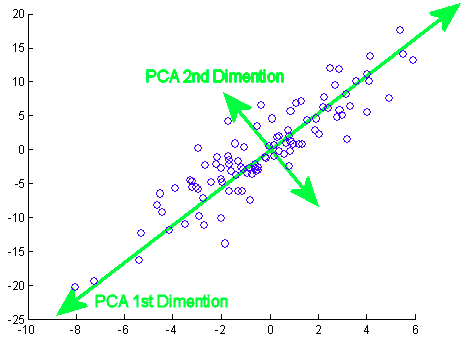

In [ ]:
X, y = load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
res = pd.DataFrame(data=res, columns = ['component 1', 'component 2'])
res['target'] = y

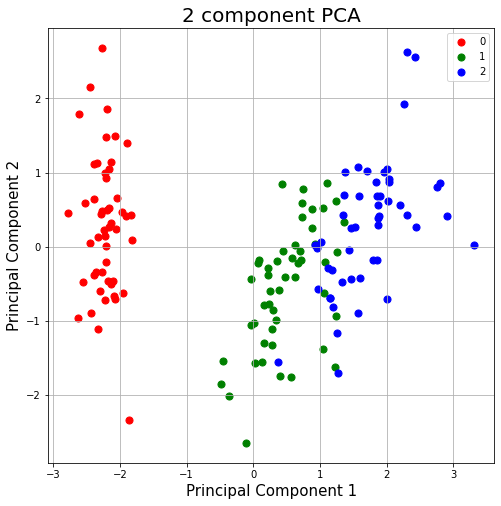

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']

for target, color in zip(res['target'].unique(), colors):
    indicesToKeep = res['target'] == target
    ax.scatter(
        res.loc[indicesToKeep, 'component 1'],
        res.loc[indicesToKeep, 'component 2'],
        c=color,
        s=50
    )
ax.legend(res['target'].unique())
ax.grid()

## Поиск аномалий

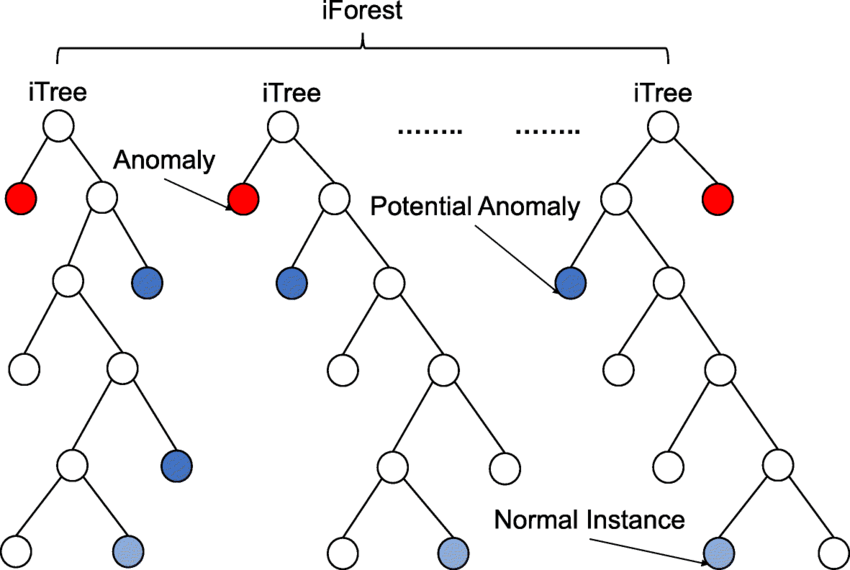

- Каждое дерево строится до исчерпании выборки
- Для построения ветвления в дереве: выбирается случайный признак и случайное расщепление
- Для каждого объекта мера его нормальности – среднее арифметическое глубин листьев, в которые он попал (изолировался)

In [ ]:
X = np.random.normal(0, 1, 10)
np.append(X, np.array([100, 200, 10, 5, 2, 1]))
clf = IsolationForest(random_state=2023, n_estimators=5).fit(X.reshape(-1, 1))
clf.predict([[0.1], [-1], [0], [15], [300], [3]])

array([ 1,  1,  1, -1, -1, -1])

## Кросс-валидация

Процесс обучения модели можно представить в следующем виде:

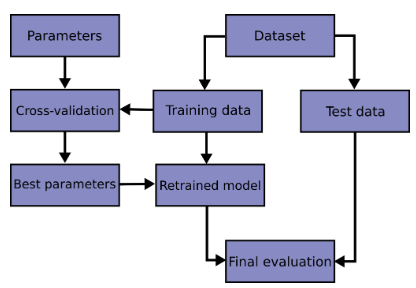

При обучении модели мы измеряем качество на тестовых данных, однако подбор моделей / гиперпараметров стоит проводить на валидационном наборе данных, а уже после финально оценивать качество на тесте.

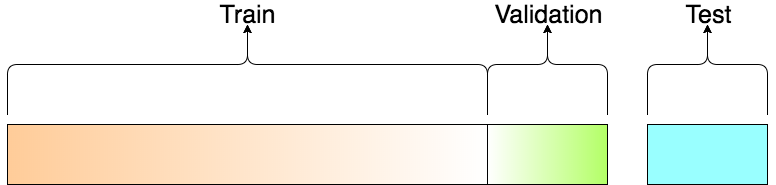

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

y = 1 - y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.15, stratify=y) # разбиение со стратификацией

#### K-Fold


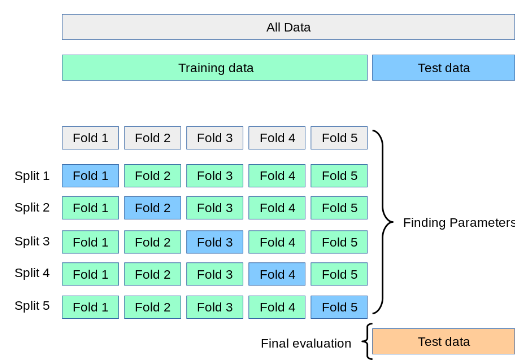

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

log_reg = LogisticRegression()
cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='f1')

array([1.        , 0.92957746, 0.98591549, 1.        , 0.91176471])

Альтернатива

In [ ]:
kf = KFold(n_splits=5)
for _, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
  train_data, train_label = X_train_scaled[train_index], y_train.iloc[train_index]
  val_data, val_label = X_train_scaled[val_index], y_train.iloc[val_index]

  log_reg = LogisticRegression()
  log_reg.fit(train_data, train_label)
  y_pred = log_reg.predict(val_data)
  print(f1_score(val_label, y_pred), end=', ')

1.0, 0.9210526315789475, 0.9841269841269841, 1.0, 0.9032258064516129, 

In [ ]:
skf = StratifiedKFold(n_splits=5)
for _, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
  train_data, train_label = X_train_scaled[train_index], y_train.iloc[train_index]
  val_data, val_label = X_train_scaled[val_index], y_train.iloc[val_index]

  log_reg = LogisticRegression()
  log_reg.fit(train_data, train_label)
  y_pred = log_reg.predict(val_data)
  print(f1_score(val_label, y_pred), end=', ')

1.0, 0.9295774647887323, 0.9859154929577464, 1.0, 0.911764705882353, 

Метод k-Fold даёт более надёжную оценку качества модели, чем hold-out, так как обучение и тест модели происходят на разных подмножествах исходного датасета.

### Leave-one-out

Метод leave-one-out является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
loo = LeaveOneOut()
for i, (train_index, val_index) in enumerate(loo.split(X_train_scaled)):
  train_data, train_label = X_train_scaled[train_index], y_train.iloc[train_index]
  val_data, val_label = X_train_scaled[val_index], y_train.iloc[val_index]

  log_reg = LogisticRegression()
  log_reg.fit(train_data, train_label)
  y_pred = log_reg.predict(val_data)
  if i % 100 == 0:
    print(f'F1-score on fold {i}: {f1_score(val_label, y_pred, zero_division=0)}')

F1-score on fold 0: 0.0
F1-score on fold 100: 0.0
F1-score on fold 200: 1.0
F1-score on fold 300: 0.0
F1-score on fold 400: 1.0


Метод может быть полезен, если очень мало данных

### Time series cross-validation

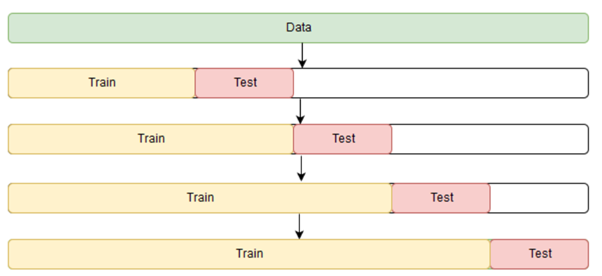

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

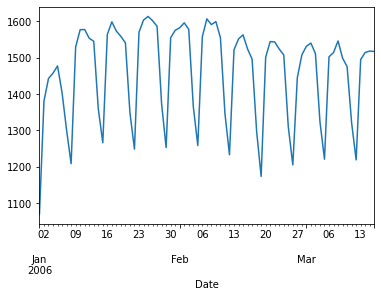

In [ ]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url, sep=",")
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data['Consumption'].iloc[:75].plot();

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_data = data.iloc[train_index]

TRAIN: [   0    1    2 ... 1095 1096 1097] TEST: [1098 1099 1100 ... 2190 2191 2192]
TRAIN: [   0    1    2 ... 2190 2191 2192] TEST: [2193 2194 2195 ... 3285 3286 3287]
TRAIN: [   0    1    2 ... 3285 3286 3287] TEST: [3288 3289 3290 ... 4380 4381 4382]
